#Bitcoin Price Prediction

In [ ]:
#Improting Libraries

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [ ]:
# Load our dataset
maindf=pd.read_csv('/content/drive/MyDrive/DV Project/BTC-USD.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3321
Total number of fields present in the dataset:  7


In [ ]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3316,2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539
3317,2023-10-17,28522.097656,28618.751953,28110.185547,28415.748047,28415.748047,14872527508
3318,2023-10-18,28413.531250,28889.009766,28174.251953,28328.341797,28328.341797,12724128586
3319,2023-10-19,28332.416016,28892.474609,28177.988281,28719.806641,28719.806641,14448058195
3320,2023-10-20,28773.451172,29703.056641,28607.021484,29703.056641,29703.056641,18864394240


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3321 non-null   object 
 1   Open       3321 non-null   float64
 2   High       3321 non-null   float64
 3   Low        3321 non-null   float64
 4   Close      3321 non-null   float64
 5   Adj Close  3321 non-null   float64
 6   Volume     3321 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.7+ KB


In [ ]:
maindf.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,3321.00,3321.00,3321.00,3321.00,3321.00,3.321000e+03
mean,14053.44,14385.67,13690.97,14060.91,14060.91,1.645132e+10
std,15959.07,16348.89,15515.33,15956.54,15956.54,1.924512e+10
min,176.90,211.73,171.51,178.10,178.10,5.914570e+06
25%,821.78,834.53,812.46,823.98,823.98,1.399610e+08
50%,8055.21,8232.78,7842.40,8052.54,8052.54,1.073261e+10
75%,22467.85,22996.44,22002.91,22487.39,22487.39,2.705580e+10
max,67549.73,68789.62,66382.06,67566.83,67566.83,3.509679e+11


##Data Preprocessing

In [ ]:
# Checking for Null Values

print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# If dataset has null values , drop all the null values present

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

##EDA(Exploratory Data Analysis)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2023-10-20


##Analysis of past 3 years.

###For year 2020

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
2294,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
2295,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
2296,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [ ]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price in 2020')
fig.show()

In [ ]:
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price in 2020')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

###For year 2021

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] <= '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2658,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
2659,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
2660,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938
2661,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000


In [ ]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price in 2021')
fig.show()

In [ ]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price in 2021')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

###For year 2022

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] <= '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2663,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
2664,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
2665,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
2666,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
2667,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
3023,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
3024,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
3025,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797
3026,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938


In [ ]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close pricein 2022')
fig.show()

In [ ]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price in 2022')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

###For year 2023

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-12-31')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
3028,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
3029,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
3030,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
3031,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
3032,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
3316,2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797
3317,2023-10-17,28522.097656,28618.751953,28110.185547,28415.748047
3318,2023-10-18,28413.531250,28889.009766,28174.251953,28328.341797
3319,2023-10-19,28332.416016,28892.474609,28177.988281,28719.806641


In [ ]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close pricein 2023')
fig.show()

In [ ]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price in 2023')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

##Building Models for Price Prediction.

In [ ]:
# Lets First Take all the Close Price

#As we want to predict the close price of the Bitcoin, we'll take only two attributes, i.e. Date and Close Price.

df = maindf.copy()

df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3321 non-null   datetime64[ns]
 1   Adj Close  3321 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.0 KB


In [ ]:
#total observations

len(df)

3321

In [ ]:
#We use only data after 2021, as before that there were many fluctations.

df = df.loc[(df['Date'] >= '2021-01-01')]

In [ ]:
#Checking length of resultatnt dataset

len(df)

1023

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

,Adj Close
Date,
2021-01-01,29374.152344
2021-01-02,32127.267578
2021-01-03,32782.023438
2021-01-04,31971.914063
2021-01-05,33992.429688


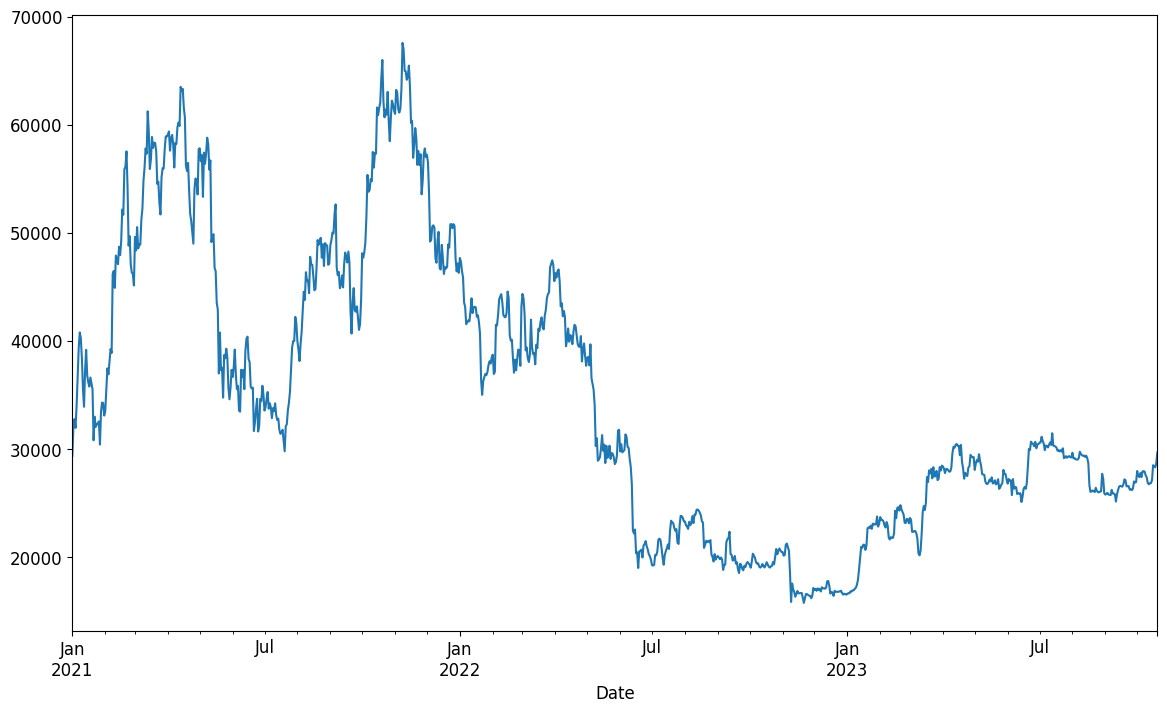

In [ ]:
plt.figure(figsize=(14,8))
df_chg['Adj Close'].plot();

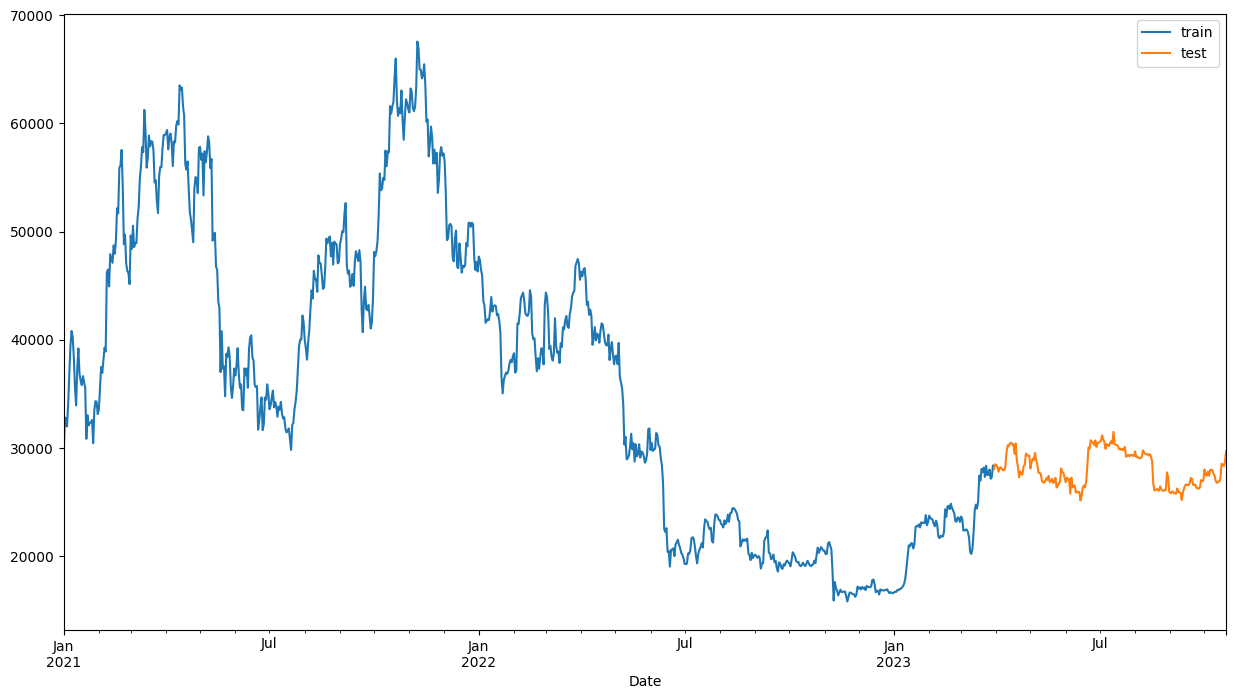

In [ ]:
df1 = df_chg['Adj Close']

# Calculate the split point based on the 80-20 split
split_point = int(len(df1) * 0.8)

# Split the data into training and testing sets
train = df1[:split_point]
test = df1[split_point:]

# Create a figure for plotting
plt.figure(figsize=(15, 8))

# Plot the training and testing data
ax = train.plot()
test.plot(ax=ax)

# Add a legend to the plot
plt.legend(['train', 'test'])

# Show the plot
plt.show()

In [ ]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 818 train values
We have 205 test values


In [ ]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:818:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[818:1023:1]

In [ ]:
# Now we scale the data using the MinMax Scaler.

scaler = MinMaxScaler(feature_range=(0, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [ ]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

###Simple ANN - Traning Model

In [ ]:
# We create a Sequantial model
# add layers via the .add() method
# Pass an input_dim argument to the first layer.
# The activation function is the Rectified Linear Unit- Relu.
# Configure the learning process, which is done via the compile method.
# A loss function is mean_squared_error , and An optimizer is adam.
# Stop training when a monitored loss has stopped improving.
# patience=2, indicate number of epochs with no improvement after which training will be stopped.
# The ANN is trained for 100 epochs and a batch size of 1 is used.

nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
817/817 [==============================] - 8s 2ms/step - loss: 0.0205
Epoch 2/100
817/817 [==============================] - 3s 3ms/step - loss: 0.0030
Epoch 3/100
817/817 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 4/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 5/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 6/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 7/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 8/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 9/100
817/817 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 10/100
817/817 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 10: early stopping


In [ ]:
# It had an early stopping at Epoch 28/100

# We predict our model and get R2 scores for train and test.

y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)

26/26 [==============================] - 0s 2ms/step


In [ ]:
#Caculating the RMSE,MSE,MAE socores for testing and training data.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MSE, and MAE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mae_train = mean_absolute_error(y_train, y_train_pred_nn)

# Calculate RMSE, MSE, and MAE for the testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_nn))
mse_test = mean_squared_error(y_test, y_pred_test_nn)
mae_test = mean_absolute_error(y_test, y_pred_test_nn)

# Print the scores for both training and testing data
print("Training Data Metrics:")
print("RMSE: {:0.7f}".format(rmse_train))
print("MSE: {:0.7f}".format(mse_train))
print("MAE: {:0.7f}".format(mae_train))

print("\nTesting Data Metrics:")
print("RMSE: {:0.7f}".format(rmse_test))
print("MSE: {:0.7f}".format(mse_test))
print("MAE: {:0.7f}".format(mae_test))

Training Data Metrics:
RMSE: 0.1153233
MSE: 0.0132995
MAE: 0.0921236

Testing Data Metrics:
RMSE: 0.0192119
MSE: 0.0003691
MAE: 0.0153737


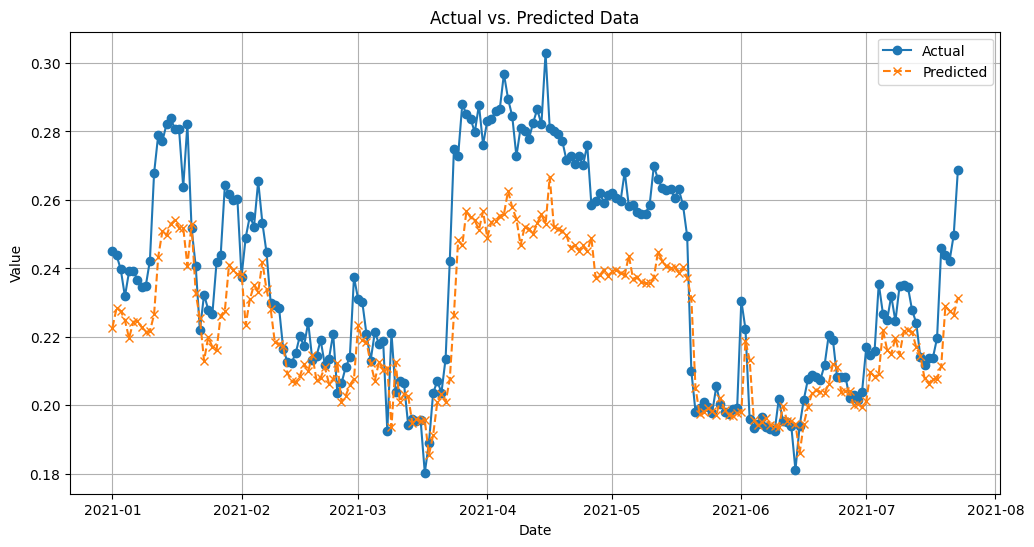

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the true target values (y_test) and predicted values (y_pred_test_nn)

# Create a date range for the x-axis based on the length of y_test
date_range = pd.date_range(start='2021-01-01', periods=len(y_test), freq='D')  # Adjust 'start_date' as needed

plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test, label='Actual', marker='o')
plt.plot(date_range, y_pred_test_nn, label='Predicted', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

###LSTM - Training Model

In [ ]:
#We use shift function that shifts the entire column by 1.

train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [ ]:
#Now, We will need to convert all our input variables in a 3D vector form.

X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (817, 1, 1)
Test shape:  (204, 1, 1)


In [ ]:
# LSTM has a visible layer with 1 input.
# A hidden layer with LSTM neurons.
# We used relu activation function for the LSTM neurons.
# A loss function is mean_squared_error , and An optimizer is adam.
# Stop training when a monitored loss has stopped improving.
# The LSTM is trained for 100 epoch and a batch size of 1 is used.

lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
817/817 [==============================] - 4s 3ms/step - loss: 0.0433
Epoch 2/100
817/817 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 3/100
817/817 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 4/100
817/817 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 5/100
817/817 [==============================] - 4s 5ms/step - loss: 0.0013
Epoch 6/100
817/817 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 7/100
817/817 [==============================] - 4s 5ms/step - loss: 0.0011
Epoch 8/100
817/817 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 9/100
817/817 [==============================] - 6s 7ms/step - loss: 0.0011
Epoch 10/100
817/817 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 11/100
817/817 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 12/100
817/817 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 13/100


In [ ]:
# It had an early stopping at Epoch /100

y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)

26/26 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MSE, and MAE for the training data
rmse_train_lstm = np.sqrt(mean_squared_error(y_train, y_train_pred_lstm))
mse_train_lstm = mean_squared_error(y_train, y_train_pred_lstm)
mae_train_lstm = mean_absolute_error(y_train, y_train_pred_lstm)

# Calculate RMSE, MSE, and MAE for the testing data
rmse_test_lstm = np.sqrt(mean_squared_error(y_test, y_pred_test_lstm))
mse_test_lstm = mean_squared_error(y_test, y_pred_test_lstm)
mae_test_lstm = mean_absolute_error(y_test, y_pred_test_lstm)

# Print the scores for both training and testing data
print("Training Data Metrics:")
print("RMSE: {:0.7f}".format(rmse_train_lstm))
print("MSE: {:0.7f}".format(mse_train_lstm))
print("MAE: {:0.7f}".format(mae_train_lstm))

print("\nTesting Data Metrics:")
print("RMSE: {:0.7f}".format(rmse_test_lstm))
print("MSE: {:0.7f}".format(mse_test_lstm))
print("MAE: {:0.7f}".format(mae_test_lstm))

Training Data Metrics:
RMSE: 0.0721297
MSE: 0.0052027
MAE: 0.0566581

Testing Data Metrics:
RMSE: 0.0157171
MSE: 0.0002470
MAE: 0.0127838


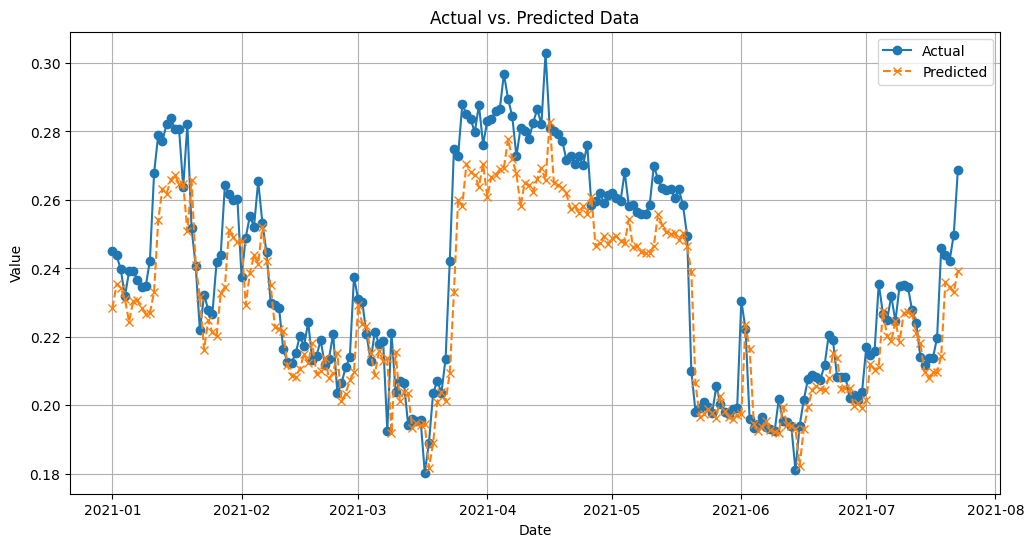

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the true target values (y_test) and predicted values (y_pred_test_ltsm)

# Create a date range for the x-axis based on the length of y_test
date_range = pd.date_range(start='2021-01-01', periods=len(y_test), freq='D')  # Adjust 'start_date' as needed

plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test, label='Actual', marker='o')
plt.plot(date_range, y_pred_test_lstm, label='Predicted', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

###ARIMA - Training Model

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


df_arima = df.copy()

# Set the 'Date' column as the index
df_arima.set_index('Date', inplace=True)

# Use MinMaxScaler to scale the 'Adj Close' values
scaler = MinMaxScaler(feature_range=(0, 1))
y_sc = scaler.fit_transform(df_arima['Adj Close'].values.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(y_sc) * 0.8)
train, test = y_sc[0:train_size], y_sc[train_size:]

# Define the ARIMA model
order = (0,2,8)  # Replace with appropriate values based on your analysis
arima_model = ARIMA(train, order=order)

# Fit the ARIMA model
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())

# Forecast future values
forecast_steps = len(test)
forecast = arima_fit.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Invert the scaling to get the original values
forecast_values = scaler.inverse_transform(forecast_values.reshape(-1, 1)).flatten()
confidence_intervals = scaler.inverse_transform(confidence_intervals)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  818
Model:                 ARIMA(0, 2, 8)   Log Likelihood                1753.179
Date:                Wed, 22 Nov 2023   AIC                          -3488.358
Time:                        18:24:05   BIC                          -3446.018
Sample:                             0   HQIC                         -3472.108
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0314      0.032    -32.646      0.000      -1.093      -0.969
ma.L2          0.0561      0.044      1.289      0.197      -0.029       0.141
ma.L3         -0.0060      0.049     -0.123      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



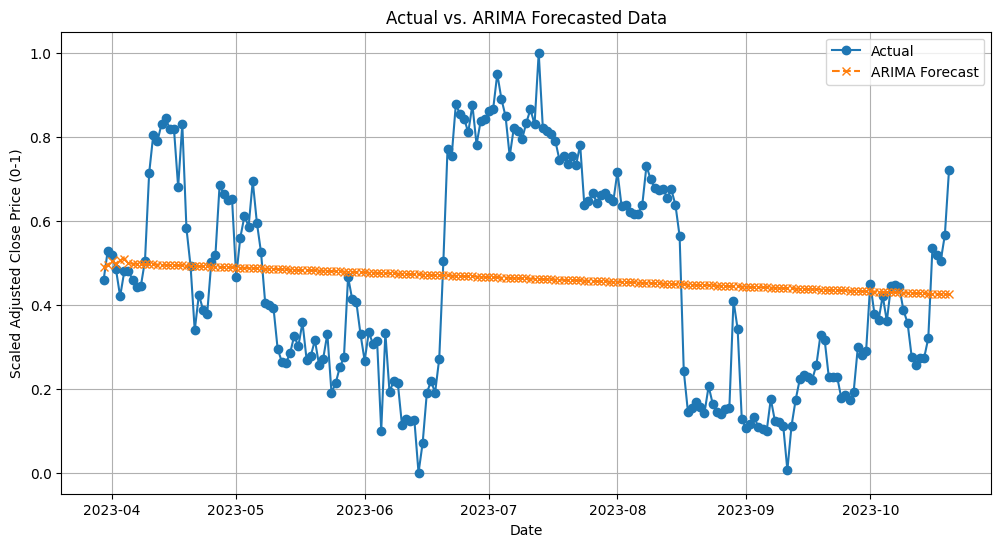

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the true target values (test) and predicted values (forecast_values)

# Create a date range for the x-axis based on the length of test
date_range_test = df_arima.index[train_size:]

# Use MinMaxScaler to scale the values between 0 and 1
scaler_y = MinMaxScaler(feature_range=(0, 1))
test_scaled = scaler_y.fit_transform(scaler.inverse_transform(test).reshape(-1, 1)).flatten()
forecast_scaled = scaler_y.transform(forecast_values.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 6))
plt.plot(date_range_test, test_scaled, label='Actual', marker='o')
plt.plot(date_range_test, forecast_scaled, label='ARIMA Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Scaled Adjusted Close Price (0-1)')
plt.title('Actual vs. ARIMA Forecasted Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MSE, and MAE for the testing data
rmse_test_arima = np.sqrt(mean_squared_error(test_scaled, forecast_scaled))
mse_test_arima = mean_squared_error(test_scaled, forecast_scaled)
mae_test_arima = mean_absolute_error(test_scaled, forecast_scaled)

# Print the scores for testing data
print("\nARIMA Testing Data Metrics:")
print("RMSE: {:0.7f}".format(rmse_test_arima))
print("MSE: {:0.7f}".format(mse_test_arima))
print("MAE: {:0.7f}".format(mae_test_arima))


ARIMA Testing Data Metrics:
RMSE: 0.2446450
MSE: 0.0598512
MAE: 0.2153707
